# CFD -- 2D Advection-Diffusion Equation
## Kelsey Malloy

### <i>last edited: 09/2020</i>

In [14]:
import numpy as np
import numpy.linalg as LA
import IPython
import matplotlib.pyplot as plt

### Functions

In [3]:
def gradientx(u,dx,order):
    # assume periodicity
    
    ux = np.zeros(u.shape)
    
    if order == 1: # FORWARD EULER
        ux[:,:-1] = (u[:,1:] - u[:,:-1])/dx
        
        ux[:,-1] = ux[:,0] # periodic
    
    elif order == -1: # BACKWARD EULER
        ux[:,1:] = (u[:,1:] - u[:,:-1])/dx
        
        ux[:,0] = ux[:,-1]
        
#     elif order == 2: # CENTERED DIFF, 2nd order
#         ux[1:-1] = (u[2:]-u[:-2]) / (2*dx)       
#         ux[0] = (u[1]-u[-2]) / (2*dx) 
#         ux[-1] = (u[1]-u[-2]) / (2*dx)
        
    return ux

In [4]:
def gradienty(u,dy,order):
    # assume periodicity
    
    uy = np.zeros(u.shape)
    
    if order == 1: # FORWARD EULER
        uy[:-1,:] = (u[1:,:] - u[:-1,:])/dy
        
        uy[:,-1] = uy[:,0] # periodic
    
    elif order == -1: # BACKWARD EULER
        uy[1:,:] = (u[1:,:] - u[:-1,:])/dy
        
        uy[0,:] = uy[-1,:]
        
#     elif order == 2: # CENTERED DIFF, 2nd order
#         ux[1:-1] = (u[2:]-u[:-2]) / (2*dx)       
#         ux[0] = (u[1]-u[-2]) / (2*dx) 
#         ux[-1] = (u[1]-u[-2]) / (2*dx)
        
    return uy

In [4]:
def rhsadv(q,u,v,dx,dy,order):
    # compute q at cell edges -- x-direction
    qe = np.zeros(u.shape,dtype=np.longdouble)
#     qe[:,1:] = q[:,:]
#     qe[:,0] = qe[:,-1]

    qe[:,1:-1] = 0.5*(q[:,:-1]+q[:,1:])
    qe[:,0]=0.5*(q[:,-1]+q[:,0]) 
    qe[:,-1]=0.5*(q[:,-1]+q[:,0]) 
    
    # flux along x edges
    f = u*qe
    
    # compute q at cell edges -- y-direction
    qe = np.zeros(v.shape,dtype=np.longdouble)
#     qe[1:,:] = q[:,:]
#     qe[0,:] = qe[-1,:]
    
    qe[1:-1,:] = 0.5*(q[:-1,:]+q[1:,:])
    qe[0,:]=0.5*(q[-1,:]+q[0,:]) 
    qe[-1,:]=0.5*(q[-1,:]+q[0,:]) 
    
    # flux along y edges
    g = v*qe
    
    # take divergence of f & g flux
    div = ((f[:,1:] - f[:,:-1]) / dx) + ((g[1:,:] - g[:-1,:]) / dy)

#     qx = gradientx(q,dx,order) # compute deriv
#     qy = gradienty(q,dy,order)
    r = -div
    return r

In [5]:
def rk1(q,u,v,diffusion,dx,dy,order,dt):
    r=rhsadv(q,u,v,dx,dy,order)
    q = q + dt*r
    
    return q

In [6]:
def rk3(q,u,v,diffusion,dx,dy,order,dt):
    r=rhsadv(q,u,v,dx,dy,order)
    qt = q + dt*r

    r = rhsadv(qt,u,v,dx,dy,order);
    qt = 0.75*q + 0.25*(qt + dt*r);

    r = rhsadv(qt,u,v,dx,dy,order);
    q = (q + 2.0*(qt + dt*r))/3.0;
    
    return q

In [7]:
def budget(q,dx,dy):
    return q.sum()*dx*dy

In [8]:
def plotfig(X,Y,u):
    #plt.clf()
    ax1.contour(X,Y,u,np.linspace(0.1,1,40))


In [9]:
def plotgrid(X,Y,Xc,Yc,Xu,Yu,Xv,Yv):
    fig=plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(X,Y,'k.')
    ax.plot(Xc,Yc,'ko')
    ax.plot(Xu,Yu,'rx')
    ax.plot(Xv,Yv,'b+')


In [10]:
def gauss(X,Y,xcenter,ycenter,xrad,yrad):
    return 1*(np.exp(-((X-xcenter)**2/(2*(xrad)**2) + (Y-ycenter)**2/(2*(yrad)**2))))

### Define the grid

In [11]:
xmin,xmax=-1,1
ymin,ymax=-1,1
nx,ny=256,256
dx,dy=(xmax-xmin)/nx,(ymax-ymin)/nx  # grid spacing
xpts,ypts = np.linspace(xmin,xmax,nx+1),np.linspace(ymin,ymax,ny+1) # cell edges excluding halos
print(dx,dy)
#print(xpts)
xc,yc = 0.5*(xpts[0:-1]+xpts[1:]), 0.5*(ypts[0:-1]+ypts[1:])
#print(xc)

X,Y = np.meshgrid(xpts,ypts)
Xc,Yc = np.meshgrid(xc,yc)
X,Y,Xc,Yc = np.longdouble(X),np.longdouble(Y),np.longdouble(Xc),np.longdouble(Yc)
#print(Y)

0.0078125 0.0078125


### Define the integration time & number of steps

In [12]:
mu = 0.5
c = 1.
diffusion = 0.
dt = mu*dx/c
print(dt)
nt = 2000#(xmax-xmin)/c/dt
print(nt)
order = -1

0.00390625
2000


### Time-stepping

initial conditions

0.06283183517926376354


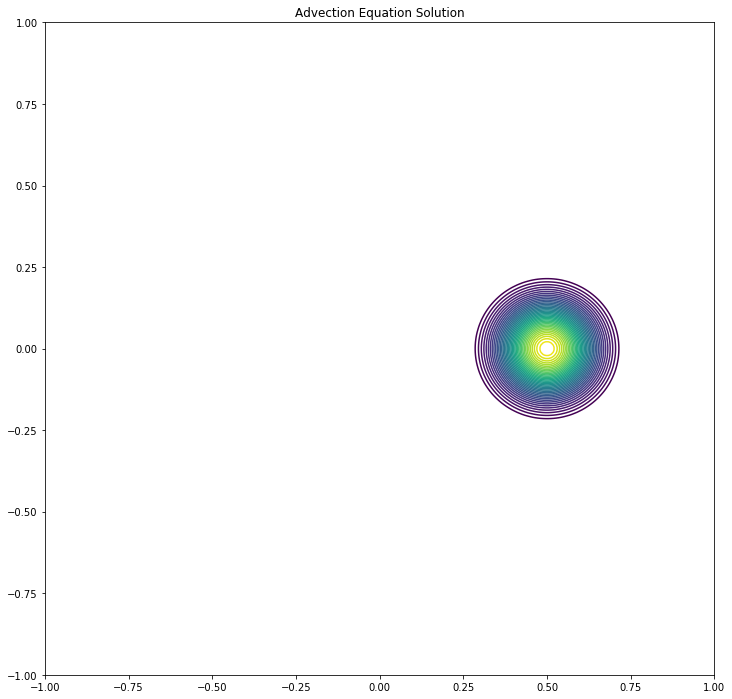

In [20]:
fig = plt.figure(1,figsize=[12,12])
ax1 = fig.add_subplot(111)
ax1.set_title('Advection Equation Solution')
ax1.set_xlim([-1,1])
ax1.set_ylim([-1,1])

q = gauss(Xc,Yc,0.5,0,xrad=0.1,yrad=0.1)
bud0 = budget(q,dx,dy)
print(bud0)
plotfig(Xc,Yc,q)
plt.show()

In [21]:
# define u and v on C-grid
Xu,Yu = np.meshgrid(xpts,yc)
Xv,Yv = np.meshgrid(xc,ypts)
#plotgrid(X,Y,Xc,Yc,Xu,Yu,Xv,Yv)

u = -Yu
v = Xv

# u = np.ones((ny,nx+1),dtype=np.longdouble)
# v = np.ones((ny+1,nx),dtype=np.longdouble)

time updates

In [33]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

In [45]:
def time_updating(t):
    q = rk3(q,u,v,diffusion,dx,dy,order,dt)
    if t%100==0:
        print(t)
        plotfig(Xc,Yc,q)

UnboundLocalError: local variable 'q' referenced before assignment

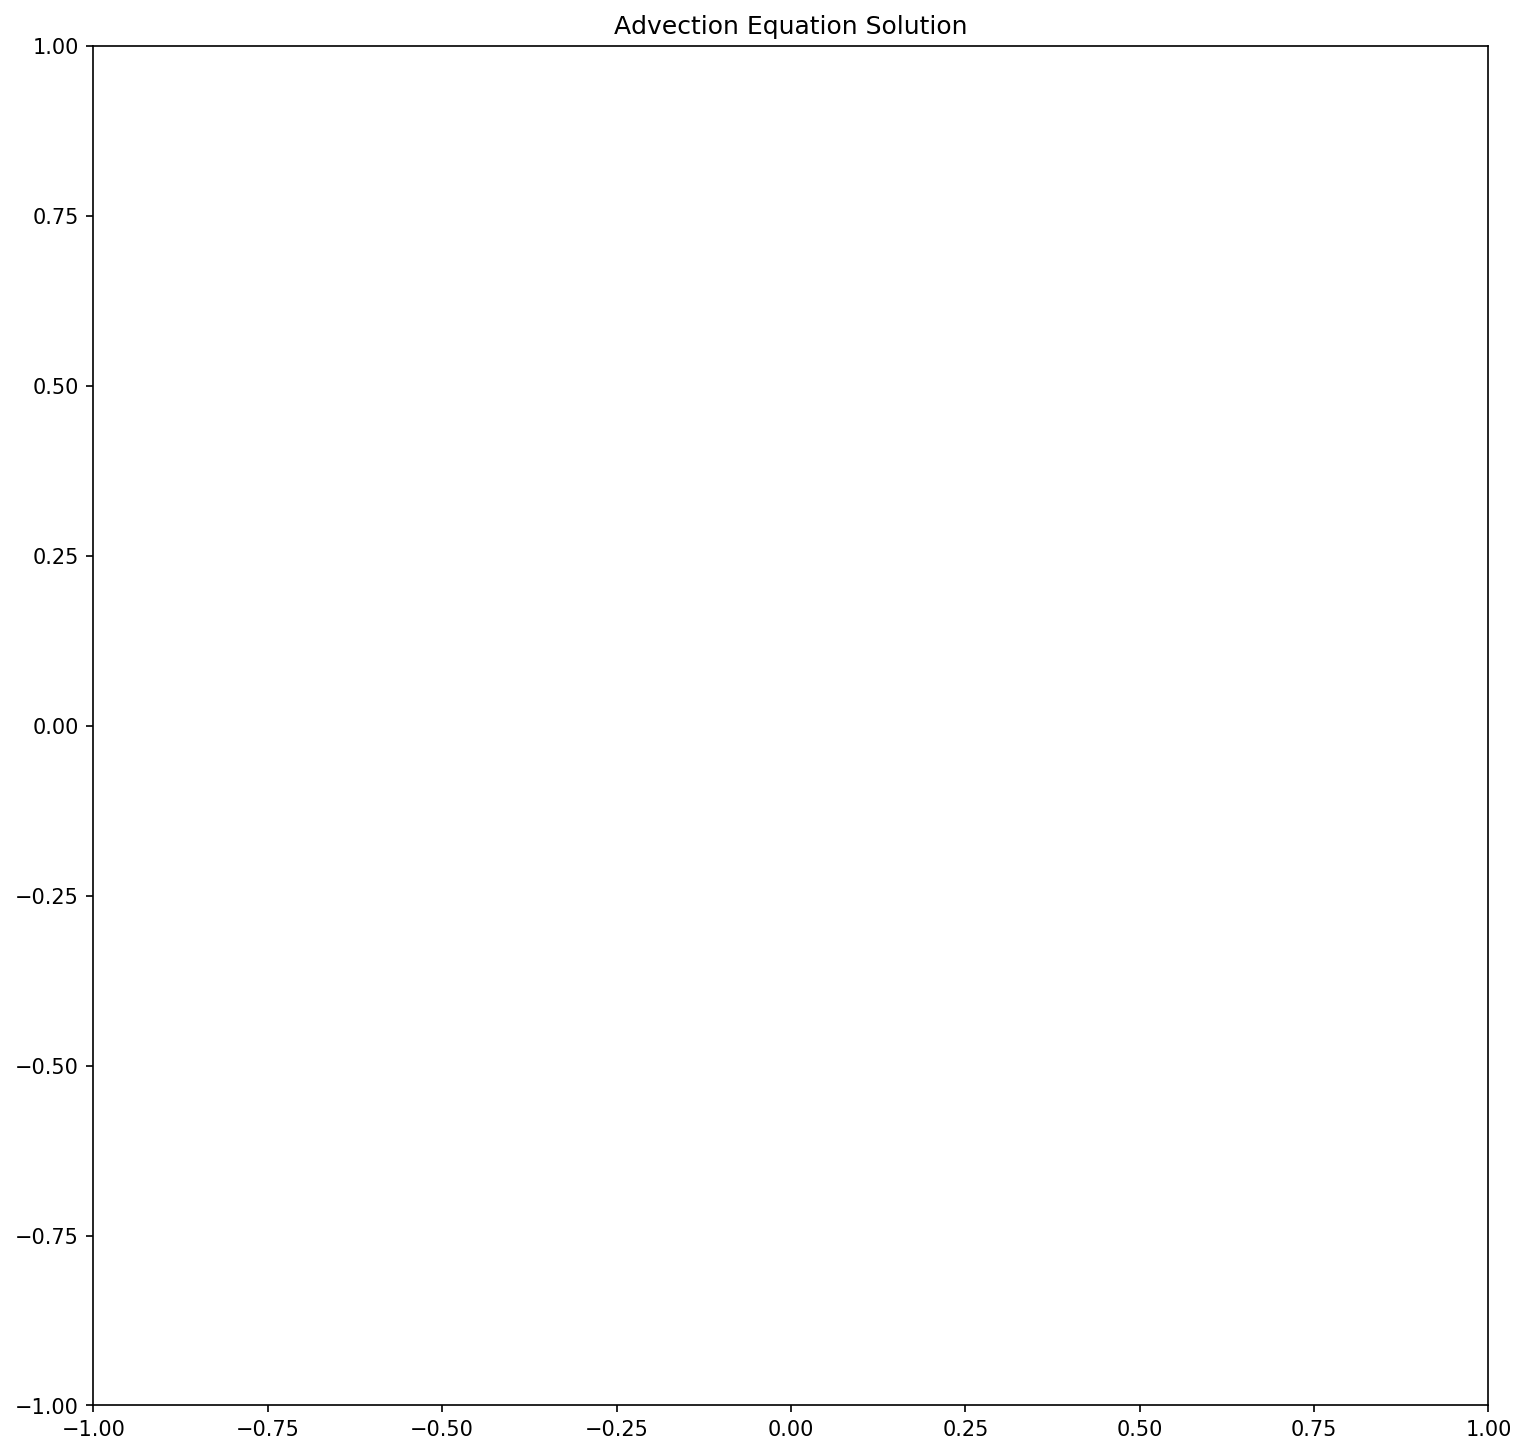

In [46]:
fig = plt.figure(1,figsize=[12,12])
ax1 = fig.add_subplot(111)
ax1.set_title('Advection Equation Solution')
ax1.set_xlim([-1,1])
ax1.set_ylim([-1,1])

for t in range(nt):
    time_updating(t)
        
matplotlib.animation.FuncAnimation(fig, plotfig, frames=int(nt/100))

Budget error:  0.0 
qmin, qmax:  -6.868701459160369392e-08 0.9990470764842522935
Budget error:  0.0 
qmin, qmax:  -1.2451070578180417888e-06 0.9995267279091627991
Budget error:  -6.7762635780344027125e-21 
qmin, qmax:  -8.1666029380197292624e-07 0.9995015317439077291
Budget error:  -6.7762635780344027125e-21 
qmin, qmax:  -6.876847242996781196e-07 0.9988494547435445665
Budget error:  -6.7762635780344027125e-21 
qmin, qmax:  -8.3644713318536342895e-07 0.9990751244488088975
Budget error:  0.0 
qmin, qmax:  -1.0220827096732438874e-06 0.9995531268475172833
Budget error:  -6.7762635780344027125e-21 
qmin, qmax:  -1.2091191159485485168e-06 0.99902134007980403457
Budget error:  -1.3552527156068805425e-20 
qmin, qmax:  -1.0353284109755258096e-06 0.9994462197507792476
Budget error:  0.0 
qmin, qmax:  -1.1354862472234112138e-06 0.9986926758481141271
Budget error:  0.0 
qmin, qmax:  -1.3538217679873132912e-06 0.99841215332911905376
Budget error:  -6.7762635780344027125e-21 
qmin, qmax:  -1.270308

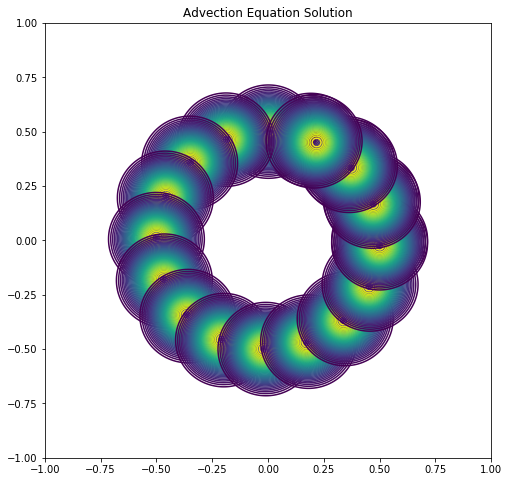

In [22]:
fig = plt.figure(1,figsize=[8,8])
ax1 = fig.add_subplot(111)
ax1.set_title('Advection Equation Solution')
ax1.set_xlim([-1,1])
ax1.set_ylim([-1,1])

for t in range(nt):
    q = rk3(q,u,v,diffusion,dx,dy,order,dt)
    if t%100==0:
        #print(t)
        bud = budget(q,dx,dy)
        print('Budget error: ',(bud-bud0),'\nqmin, qmax: ',q.min(),q.max())
        plotfig(Xc,Yc,q)
        plt.draw()